In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandapower as pp

## Levantar los datos

In [4]:
red = "30"  # "118" o "30"

if red == "118":
    net = pp.networks.case118()
    net.line.max_i_ka /= 20
else:
    net = pp.networks.case30()

input_path = f'./red{red}/train/input.npy'
y_path = f'./red{red}/train/vm_pu_opt.npy'


x = np.load(input_path)
y = np.load(y_path).squeeze()

print("Tenemos {} muestras de entrenamiento".format(x.shape[0]))


Tenemos 6 muestras de entrenamiento


## Metadata Red
 


In [5]:
idx_gen = net.gen.bus.values
idx_load = net.load.bus.values
idx_ext_grid = net.ext_grid.bus.values

print(f"La red {red} tiene {len(net.bus)} buses")
print(f"La red {red} tiene {len(net.line)} lineas")
print(f"La red {red} tiene {len(net.ext_grid)} barras de referencia")
print(f"La red {red} tiene {len(net.gen)} generadores")
print(f"La red {red} tiene {len(net.load)} cargas")

print(f"La red {red} tiene {len(net.shunt)} shunts")
print(f"La red {red} tiene {len(net.trafo)} trafos")
print(f"La red {red} tiene {len(net.switch)} switches")



La red 30 tiene 30 buses
La red 30 tiene 41 lineas
La red 30 tiene 1 barras de referencia
La red 30 tiene 5 generadores
La red 30 tiene 20 cargas
La red 30 tiene 2 shunts
La red 30 tiene 0 trafos
La red 30 tiene 0 switches


## Graficas

### Entradas

In [ ]:
for i in idx_load:
    plt.hist(x[:, i, 0], bins=30,alpha=0.7) 
    plt.title(f'Histograma de carga activa')
    plt.xlabel('Potencia')
    plt.ylabel('Frecuencia')
plt.show()


for i in idx_load:
    plt.hist(x[:, i, 0], bins=30,alpha=0.7) 
    plt.title(f'Histograma de carga activa por carga {i}')
    plt.xlabel('Potencia')
    plt.ylabel('Frecuencia')
    plt.show()

In [ ]:
for i in idx_load:
    plt.hist(x[:, i, 1], bins=30,alpha=0.7) 
    plt.title(f'Histograma de carga reactiva')
    plt.xlabel('Potencia')
    plt.ylabel('Frecuencia')
    # plt.xlim(0.89,1.11)
    # plt.ylim(0,1200)
plt.show()


for i in idx_load:
    plt.hist(x[:, i, 1], bins=30,alpha=0.7) 
    plt.title(f'Histograma de carga reactiva por carga {i}')
    plt.xlabel('Potencia')
    plt.ylabel('Frecuencia')
    # plt.xlim(0.89,1.11)
    # plt.ylim(0,1200)
    plt.show()

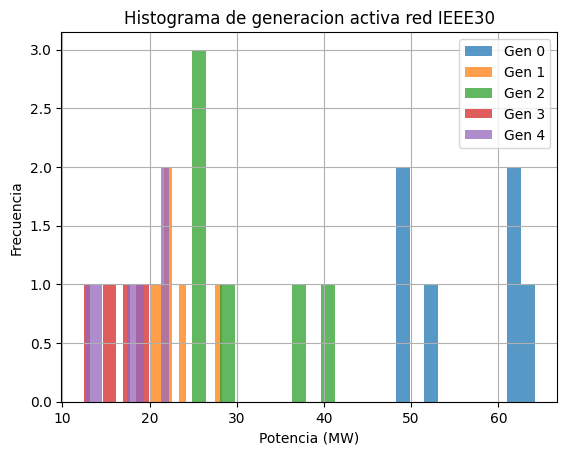

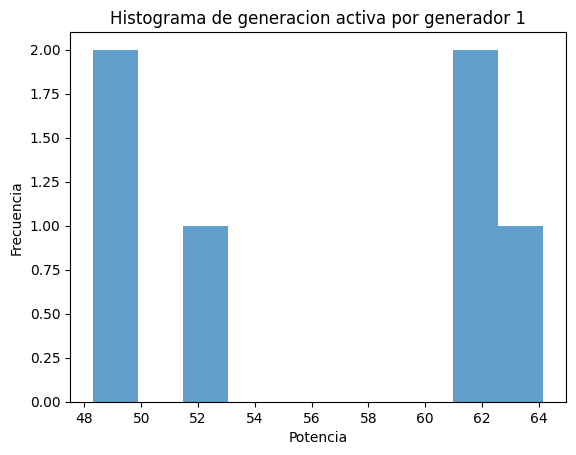

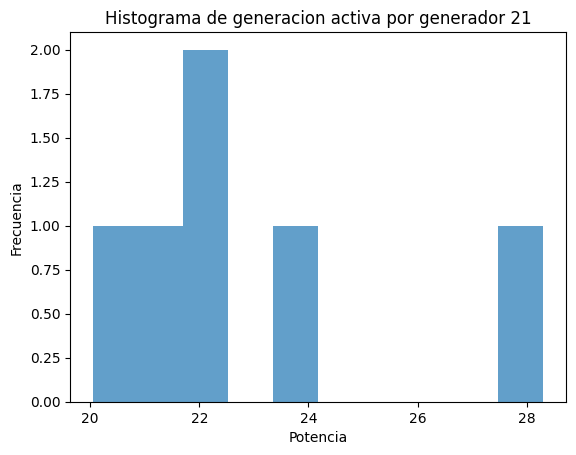

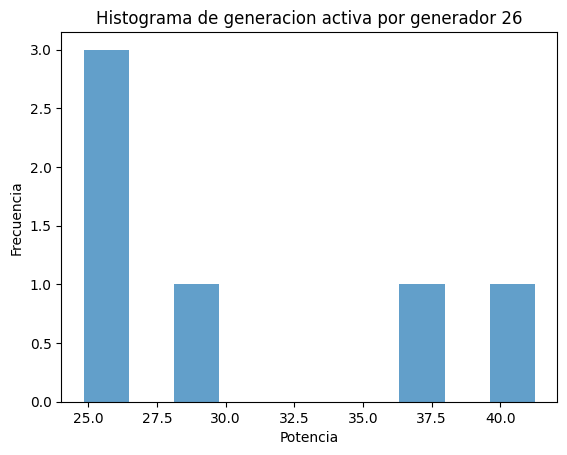

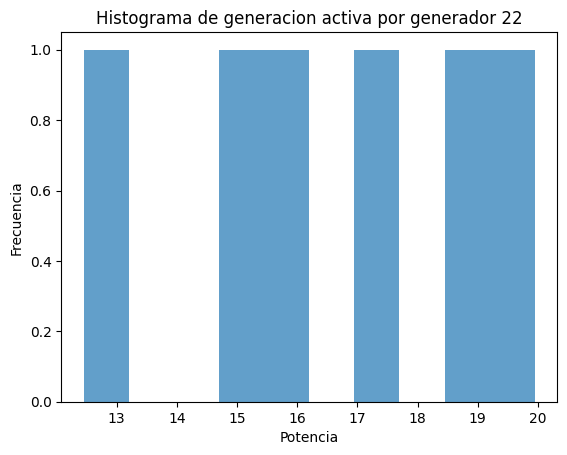

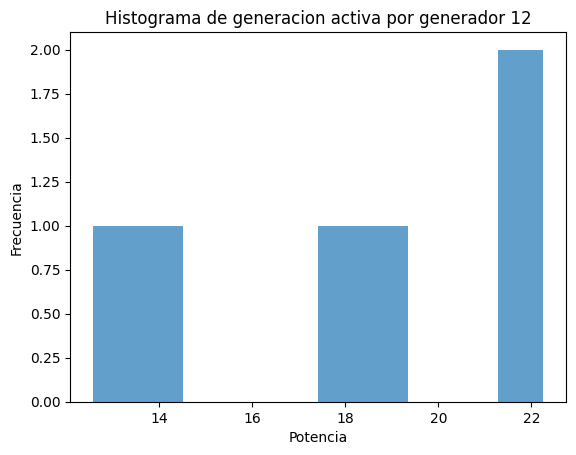

In [9]:
fig = plt.figure()
for j,i in enumerate(idx_gen):
    plt.hist(x[:, i, 2],label=f'Gen {j}', bins=10,alpha=0.75) 

    # plt.xlim(0.89,1.11)
    # plt.ylim(0,1200)
plt.title(f'Histograma de generacion activa red IEEE30')
plt.xlabel('Potencia (MW)')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid()
plt.show()
#save as pdf
fig.savefig('hist_gen_red30.pdf')


for i in idx_gen:
    plt.hist(x[:, i, 2], bins=10,alpha=0.7) 
    plt.title(f'Histograma de generacion activa por generador {i}')
    plt.xlabel('Potencia')
    plt.ylabel('Frecuencia')
    # plt.xlim(0.89,1.11)
    # plt.ylim(0,1200)
    plt.show()

### Voltajes optimos

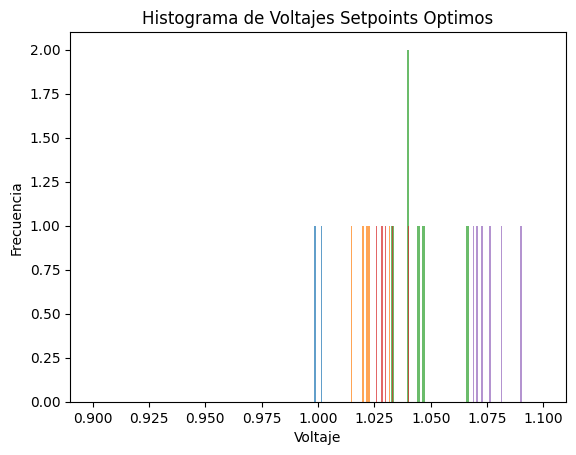

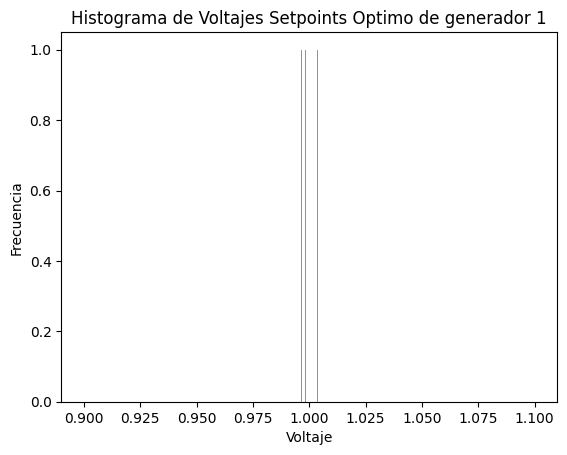

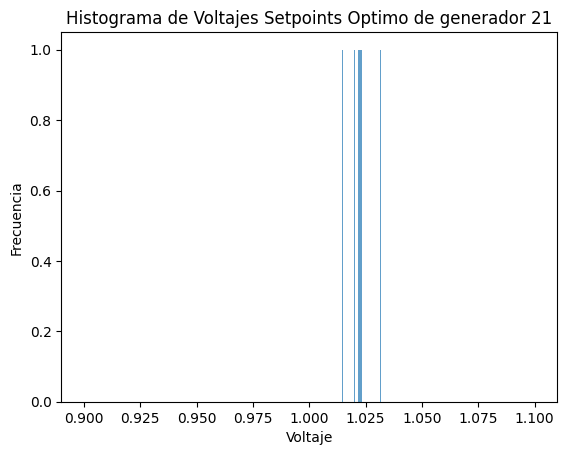

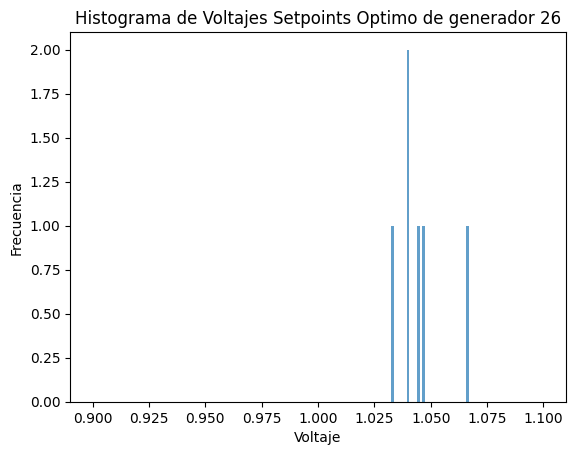

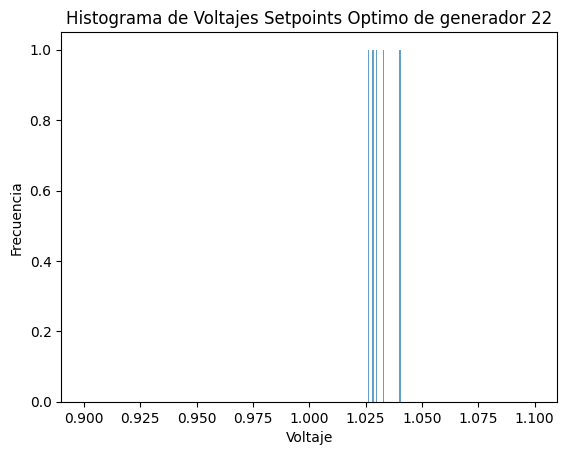

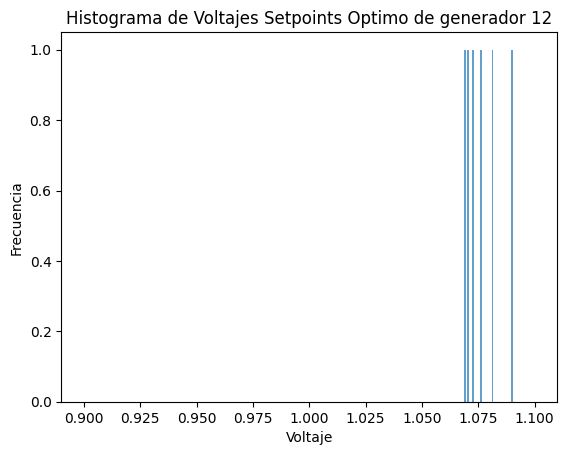

In [10]:

for i in idx_gen:
    plt.hist(y[:, i], bins=30,alpha=0.7) 
    plt.title(f'Histograma de Voltajes Setpoints Optimos')
    plt.xlabel('Voltaje')
    plt.ylabel('Frecuencia')
    plt.xlim(0.89,1.11)
    # plt.ylim(0,1200)
plt.show()


for i in idx_gen:
    plt.hist(y[:, i], bins=30,alpha=0.7) 
    plt.title(f'Histograma de Voltajes Setpoints Optimo de generador {i}')
    plt.xlabel('Voltaje')
    plt.ylabel('Frecuencia')
    plt.xlim(0.89,1.11)
    # plt.ylim(0,1200)
    plt.show()
    


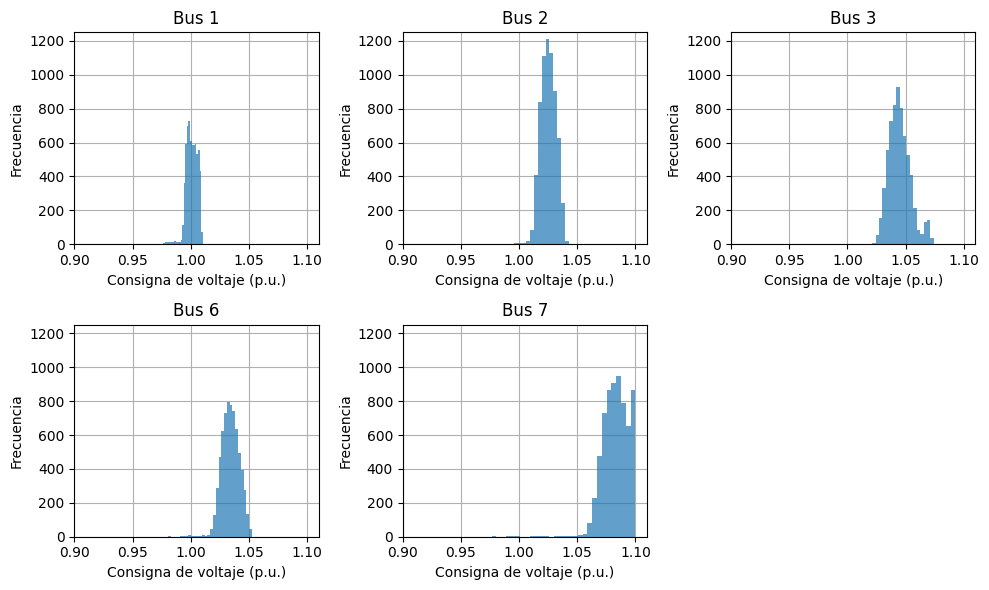

In [50]:
# solo para ieee 30

fig, axs = plt.subplots(2, 3, figsize=(10, 6))
for idx,i in enumerate(idx_gen):
    row = idx//3
    column = idx%3
    axs[row,column].hist(y[:,i], bins=30,alpha=0.7)
    axs[row,column].set_title(f'Bus {idx_load[idx]}')
    axs[row,column].set_xlabel('Consigna de voltaje (p.u.)')
    axs[row,column].set_ylabel('Frecuencia')
    axs[row,column].grid()
    axs[row,column].set_axisbelow(True)
    # set x and y axis limits
    axs[row,column].set_xlim(0.9, 1.11)
    axs[row,column].set_ylim(0, 1250)
    
fig.delaxes(axs[1, 2])

plt.tight_layout()
plt.show()

fig.savefig('hist_voltajes_red30.pdf')

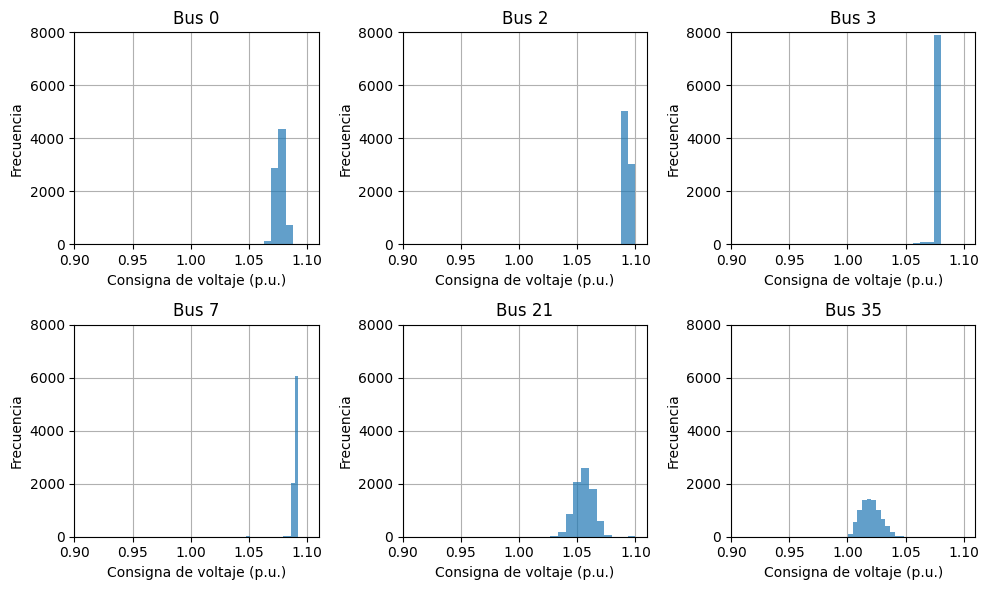

In [54]:
# solo para ieee 118

fig, axs = plt.subplots(2, 3, figsize=(10, 6))
ids = [0,2,3,6,18,29]
for idx,i in enumerate(idx_gen[ids]):
    row = idx//3
    column = idx%3
    axs[row,column].hist(y[:,i], bins=30,alpha=0.7)
    axs[row,column].set_title(f'Bus {idx_load[ids][idx]}')
    axs[row,column].set_xlabel('Consigna de voltaje (p.u.)')
    axs[row,column].set_ylabel('Frecuencia')
    axs[row,column].grid()
    axs[row,column].set_axisbelow(True)
    # set x and y axis limits
    axs[row,column].set_xlim(0.9, 1.11)
    axs[row,column].set_ylim(0, 8000)
    

plt.tight_layout()
plt.show()

fig.savefig('hist_voltajes_red118.pdf')